In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [ ]:
data.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [ ]:
col = data.columns

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
scale = ['clonesize','MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'seeds']
scaler = MinMaxScaler()
data[scale] = scaler.fit_transform(data[scale])
data.head()'''

"from sklearn.preprocessing import MinMaxScaler\nscale = ['clonesize','MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'seeds']\nscaler = MinMaxScaler()\ndata[scale] = scaler.fit_transform(data[scale])\ndata.head()"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

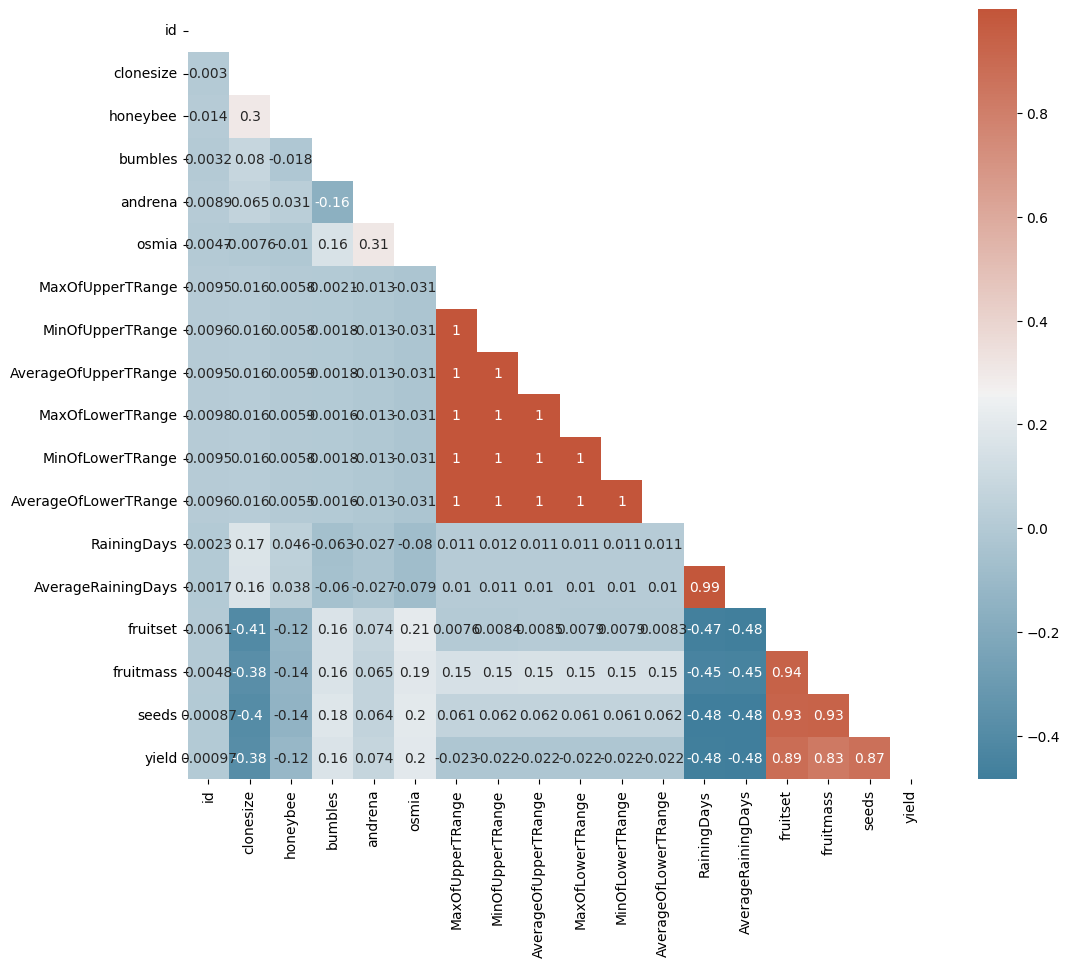

In [ ]:
corr = data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

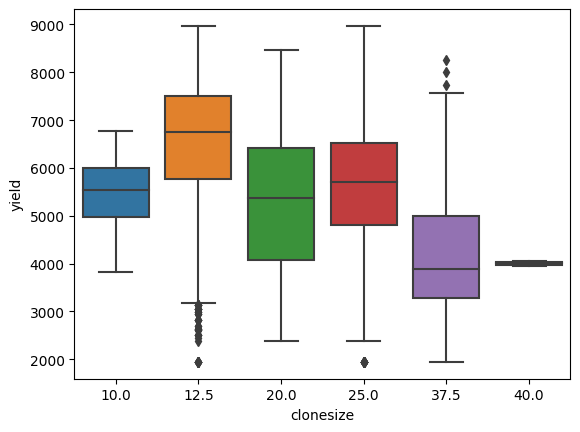

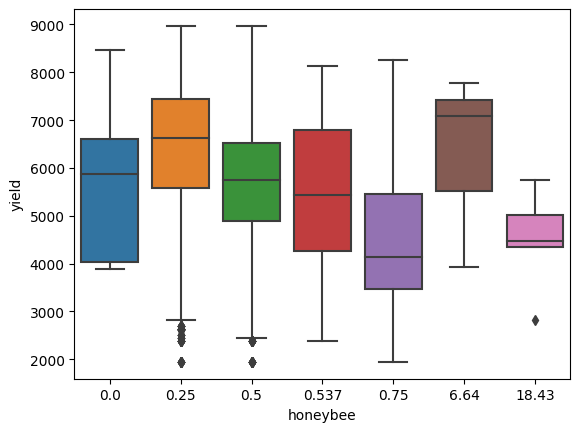

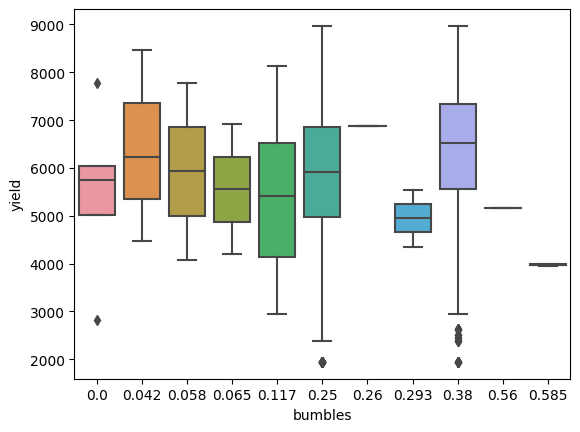

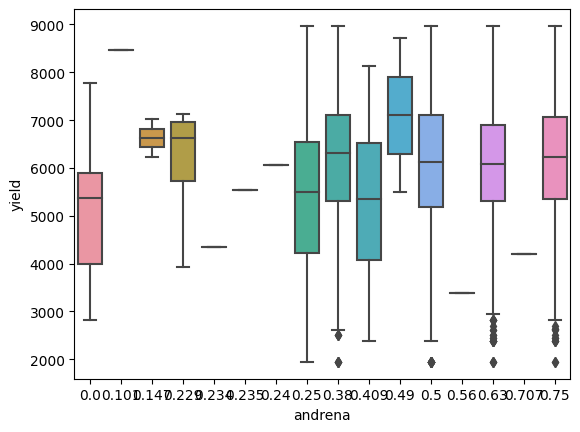

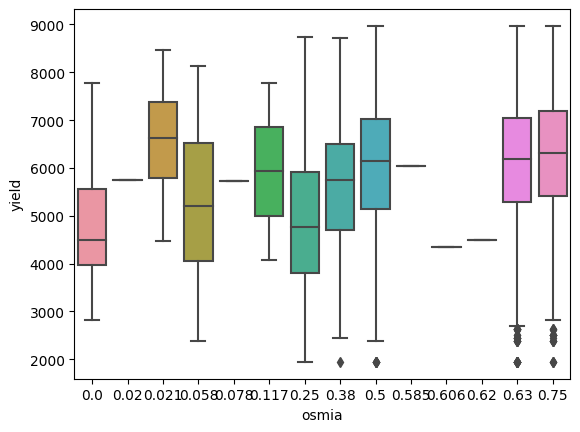

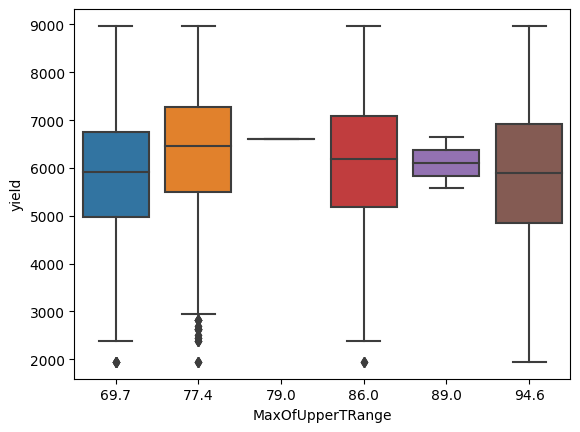

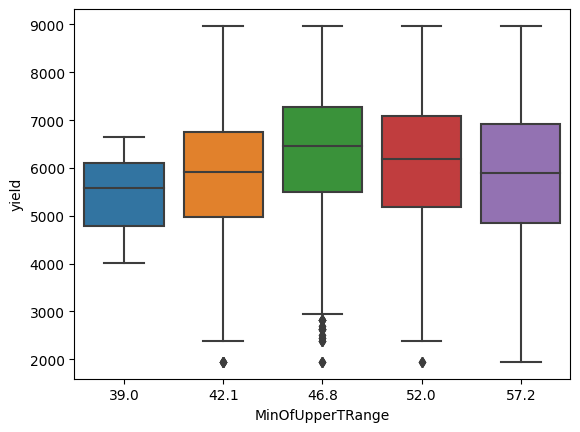

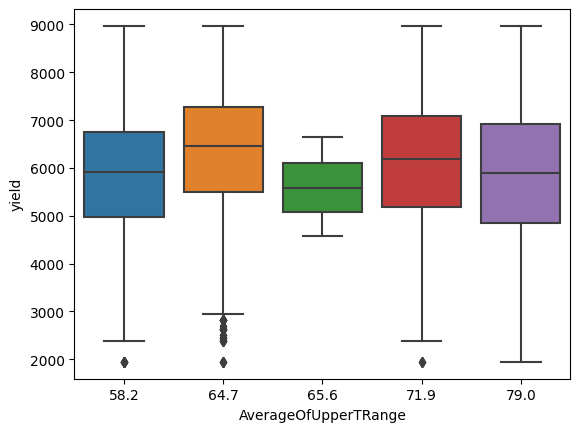

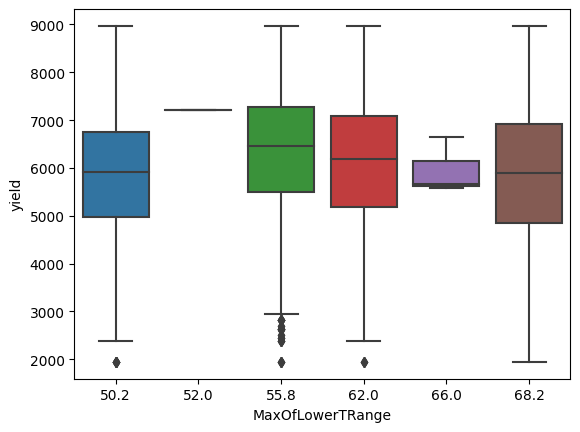

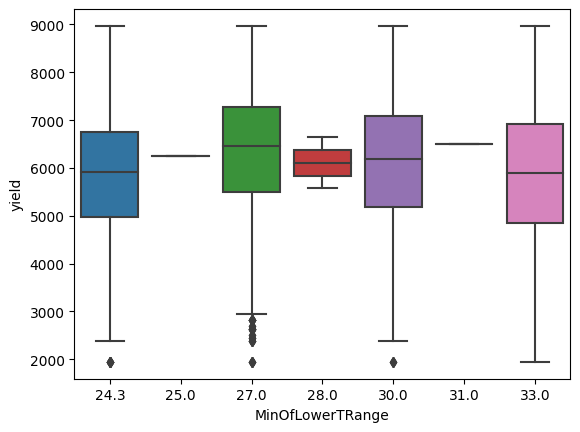

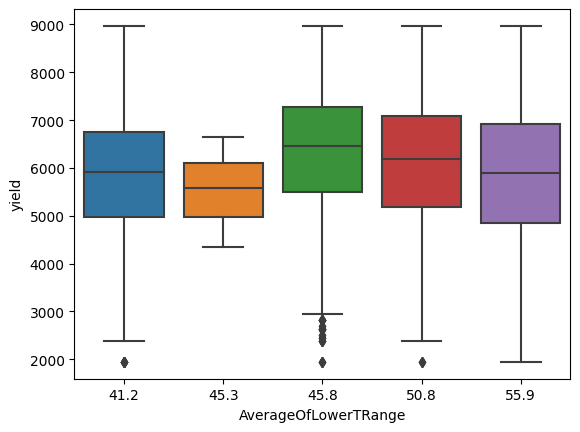

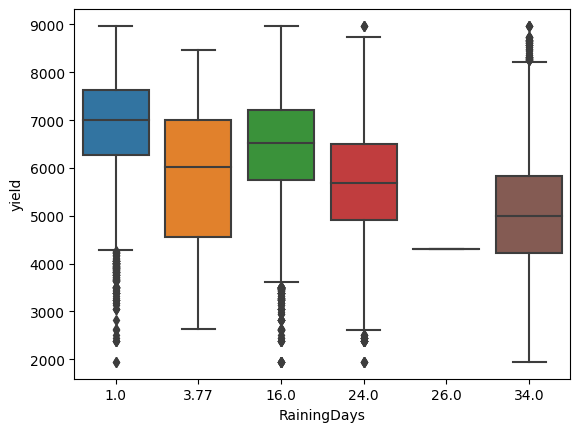

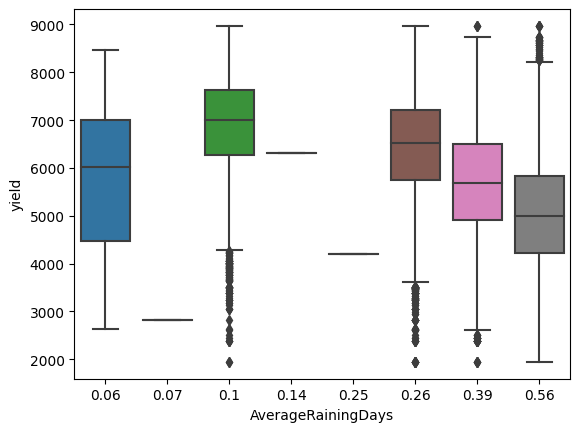

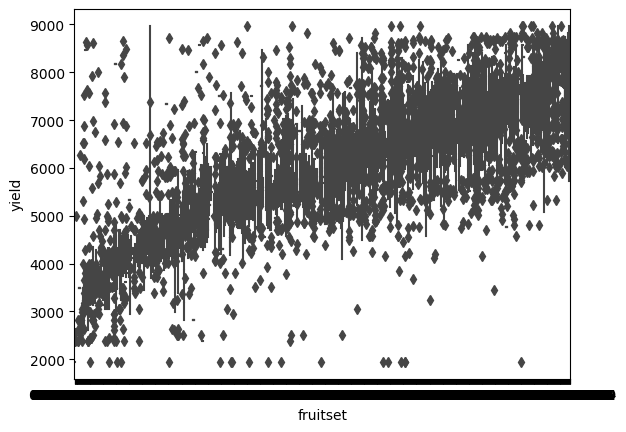

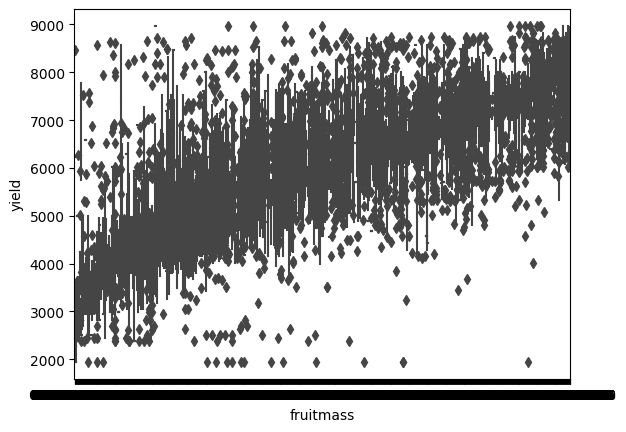

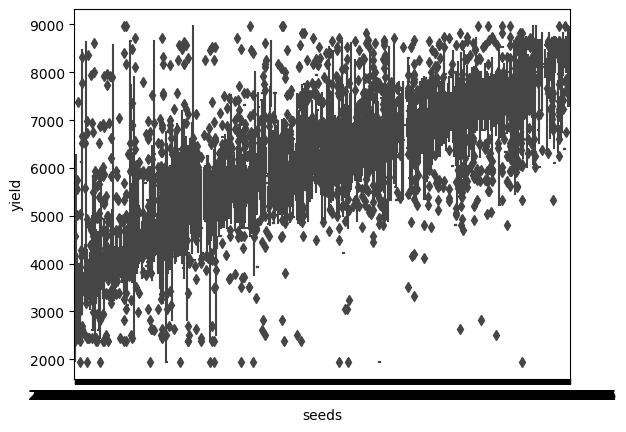

In [ ]:
# Sample dataset
for i in col[1:len(col)-1]:
    sns.boxplot(data=data, x=i, y='yield')
    plt.show()

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(data))
threshold = 3  # You can adjust the threshold value based on your dataset
outlier_rows, outlier_cols = np.where(z_scores > threshold)


In [ ]:
#replacing
for row, co in zip(outlier_rows, outlier_cols):
    column_values = data.iloc[:, co]
    mode_value = stats.mode(column_values)[0][0]
    data.iloc[row, co] = mode_value

<ipython-input-54-5e0fb093be19>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(column_values)[0][0]


In [ ]:
'''z_scores = (data - data.mean()) / data.std()
outliers = data[(z_scores.abs() > 3).any(axis=1)]
print(outliers)'''

'z_scores = (data - data.mean()) / data.std()\noutliers = data[(z_scores.abs() > 3).any(axis=1)]\nprint(outliers)'

In [ ]:
'''#removing outliers
data = data[(z_scores.abs() <= 3).all(axis=1)]
data.info()'''

'#removing outliers\ndata = data[(z_scores.abs() <= 3).all(axis=1)]\ndata.info()'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
X,y = data.drop(['yield'],axis=1),data['yield']

In [ ]:
model1 = RandomForestRegressor(n_estimators = 700,random_state = 0)
model2 =  XGBRegressor(n_estimators=700, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model3 = DecisionTreeRegressor(random_state = 0)
model4 = SVR(C=1.0, epsilon=0.2,kernel = 'linear')
model5 = SVR(C=1.0,epsilon=0.2,kernel = 'precomputed')

In [ ]:
for i in [model1,model2,model3,model4,model5]:
  scores = cross_val_score(i,X,y,scoring ='neg_mean_absolute_error',cv = cv, n_jobs =-1)
  scores = np.absolute(scores)
  print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 363.644 (9.348)
Mean MAE: 406.310 (10.749)
Mean MAE: 526.917 (14.752)


In [ ]:
test = pd.read_csv('/content/test.csv')
# Treat the test data in the same way as training data. In this case, pull same columns.
# Use the model to make predictionsfrom sklearn.preprocessing import MinMaxScaler
'''scale = ['clonesize','MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'seeds']
scaler = MinMaxScaler()
test[scale] = scaler.fit_transform(test[scale])
test.head()'''

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(test))
threshold = 3  # You can adjust the threshold value based on your dataset
outlier_rows, outlier_cols = np.where(z_scores > threshold)

In [ ]:
for row, co in zip(outlier_rows, outlier_cols):
    column_values = test.iloc[:, co]
    mode_value = stats.mode(column_values)[0][0]
    test.iloc[row, co] = mode_value

In [ ]:
model2.fit(X,y)
predicted_yield = model2.predict(test)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_yield)

In [ ]:
my_submission = pd.DataFrame({'Id': test.id, 'yield': predicted_yield})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)